# Wisconsin Breast Cancer

## Importing libraries

In [3]:
import sys
sys.path.append('../') 
from imports import *

## Loading dataset

In [4]:
# Fetch the Adult dataset with as_frame=True to get a DataFrame
adult_dataset = fetch_openml(name='adult', version=2, as_frame=True)

# The dataset is now a DataFrame with feature names as columns
X = adult_dataset['data']  # Features as a DataFrame
y = adult_dataset['target'].apply(lambda x: 0 if x == '<=50K' else 1)  # Labels as a Series

# Combine the features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Rename the target series to have a meaningful column name
df.rename(columns={ df.columns[-1]: "target" }, inplace = True)
df.head()

NameError: name 'fetch_openml' is not defined

## EDA: Exploratory Data analysis

### Missing values

In [3]:
# missing values in 3 categorical columns: workclass, occupation, native-country
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
target               0
dtype: int64

Ways to handle missing values:
1. Imputation with placeholder category: 'Missing' or 'Not available NA'
2. Removal of rows with missing values (throwing the information)
3. Removal of features with missing values (throwing the information)

### Class imbalance

In [4]:
# Too much class imbalance, how to handle this?
df.target.value_counts()

target
0    37155
1    11687
Name: count, dtype: int64

In [5]:
# Count the occurrences of each class (1 and 0)
class_counts = df['target'].value_counts()
class_percentages = class_counts / len(df) * 100

# print(f"Class Percentages: {class_percentages:.2f}")
for class_label, percentage in class_percentages.items():
    print(f"Class {class_label}: {percentage:.2f}%")

Class 0: 76.07%
Class 1: 23.93%


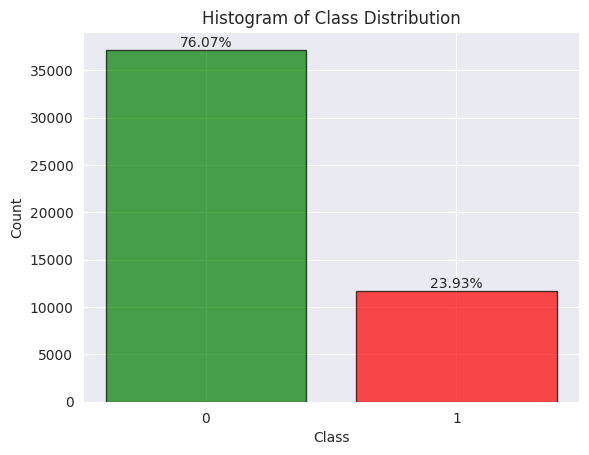

In [6]:
# Plotting histogram with different colors for each class
plt.bar(0, class_counts[0], color='green', edgecolor='black', alpha=0.7)
plt.bar(1, class_counts[1], color='red', edgecolor='black', alpha=0.7)
plt.xticks([0, 1])
plt.title('Histogram of Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotating the histogram with class percentages
plt.text(0, class_counts[0], f'{class_percentages[0]:.2f}%', ha='center', va='bottom')
plt.text(1, class_counts[1], f'{class_percentages[1]:.2f}%', ha='center', va='bottom')

plt.show()

### Correlation matrix

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  float64 
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  float64 
 3   education       48842 non-null  category
 4   education-num   48842 non-null  float64 
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  float64 
 11  capital-loss    48842 non-null  float64 
 12  hours-per-week  48842 non-null  float64 
 13  native-country  47985 non-null  category
 14  target          48842 non-null  category
dtypes: category(9), float64(6)
memory usage: 2.7 MB


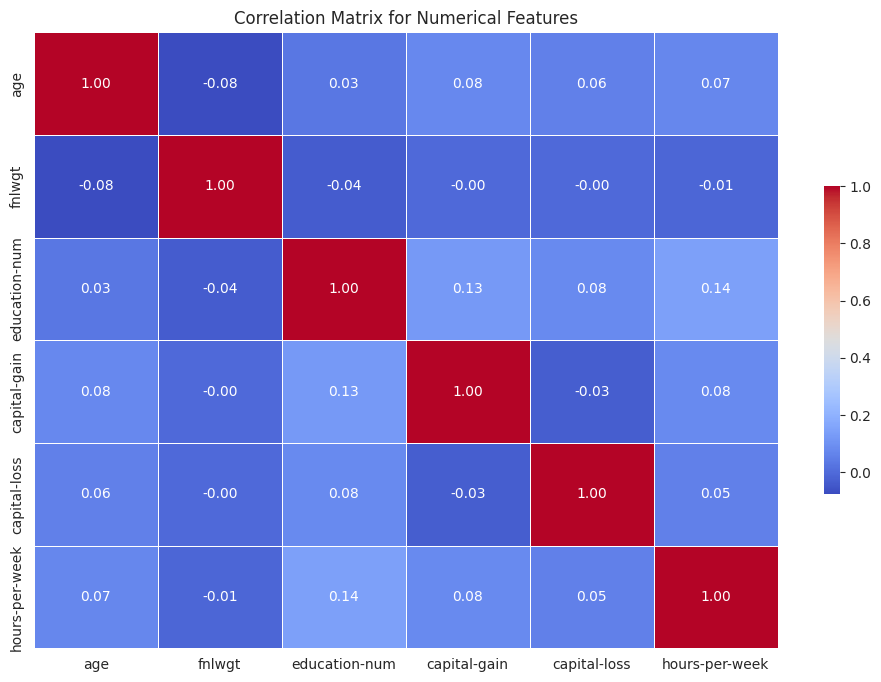

In [8]:
# Select only the numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical features
correlation_matrix_numerical = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numerical, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [9]:
# to be done next: one hot encoding of the categorical features

## Models / hypothesis class

#### things to do:
1. test every model using train, val, test set
2. hyperparameter tuning (optuna / weights and biases / tensorboard)

### Models to do: 
1. Logistic Regression with and without regularization
2. SVM with and without kernels
3. PCA + k-NN
4. FNN (1-layer and 2-layer)